# Data Collection
This notebook collects the data that is used in my project. This is done by querying [DBpedia](https://wiki.dbpedia.org/) with SPARQL.

(I am new to SPARQL so queries might not be optimal)

In [18]:
from SPARQLWrapper import SPARQLWrapper, JSON, XML, N3, RDF
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

Given a SPARQL query and a label (i.e *Person*, *Animal*, *City* etc.) the function getData will query DBpedia, extract the abstract and label the abstracts with the given label. Returns a pandas dataframe.

In [11]:
sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.setReturnFormat(JSON)
prefix = """PREFIX owl: <http://www.w3.org/2002/07/owl#>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX foaf: <http://xmlns.com/foaf/0.1/>
    PREFIX dc: <http://purl.org/dc/elements/1.1/>
    PREFIX : <http://dbpedia.org/resource/>
    PREFIX dbpedia2: <http://dbpedia.org/property/>
    PREFIX dbpedia: <http://dbpedia.org/>
    PREFIX skos: <http://www.w3.org/2004/02/skos/core#>"""
def getData(query,db_type, label):
    sparql.setQuery(prefix+query)
    results = sparql.query().convert()
    res = pd.DataFrame.from_dict(results["results"]["bindings"])
    df = pd.DataFrame()
    df['page'] = res[db_type].apply(lambda text: text['value'])
    df['abstract'] = res['abstract'].apply(lambda text: text['value'])
    df['label'] = label
    return df

Building a bunch of queries to compile a dataset consisting of abstracts of different classes.

In [44]:
persons = getData("""SELECT ?person, ?abstract WHERE {
    ?person dbo:abstract ?abstract .
    ?person a dbo:Person .
    FILTER (lang(?abstract) = 'en')
}
""", 'person','Person')
cities = getData("""SELECT ?city, ?abstract WHERE {
    ?city dbo:abstract ?abstract .
    ?city a dbo:City .
    ?city dbo:populationTotal ?pop .
    FILTER (lang(?abstract) = 'en' && ?pop > 1000)
}
""", 'city','City')
mammals = getData("""SELECT ?animal, ?abstract WHERE {
    ?animal dbo:abstract ?abstract .
    ?animal a dbo:Mammal .
    FILTER (lang(?abstract) = 'en')
}
""",'animal', 'Mammal')
fish = getData("""SELECT ?animal, ?abstract WHERE {
    ?animal dbo:abstract ?abstract .
    ?animal a dbo:Fish .
    FILTER (lang(?abstract) = 'en')
}
""",'animal', 'Fish')
countries = getData("""SELECT ?country, ?abstract WHERE {
    ?country dbo:abstract ?abstract .
    ?country dbo:populationTotal ?pop .
    ?country a dbo:Country .
    FILTER (lang(?abstract) = 'en' && ?pop > 10000)
}
""",'country', 'Country')
companies = getData("""SELECT ?company, ?abstract WHERE {
    ?company dbo:abstract ?abstract .
    ?company a dbo:Company .
    ?company dbo:numberOfEmployees ?employees .
    FILTER (lang(?abstract) = 'en' && ?employees > 1000)
}
""",'company', 'Company')
books = getData("""SELECT ?book, ?abstract WHERE {
    ?book dbo:abstract ?abstract .
    ?book a dbo:Book .
    ?book dbo:isbn ?isbn .
    ?book dbo:numberOfPages ?pages .
    FILTER (lang(?abstract) = 'en' && ?pages>100)
} LIMIT 5000
""",'book', 'Book')
universities = getData("""SELECT ?university, ?abstract WHERE {
    ?university dbo:abstract ?abstract .
    ?university a dbo:University .
    ?university dbo:numberOfStudents ?students
    FILTER (lang(?abstract) = 'en' && ?students>1000)
}
""",'university', 'University')
planets = getData("""SELECT ?planet, ?abstract WHERE {
    ?planet dbo:abstract ?abstract .
    ?planet a dbo:Planet .
    FILTER (lang(?abstract) = 'en')
}
""",'planet', 'Planet')

In [52]:


print(len(planets))
planets.head()

4673


,page,abstract,label
0,http://dbpedia.org/resource/2060_Chiron,"2060 Chiron, also known as 95P/Chiron, is a mi...",Planet
1,http://dbpedia.org/resource/243_Ida,243 Ida (/ˈaɪdə/) is an asteroid in the Koroni...,Planet
2,http://dbpedia.org/resource/253_Mathilde,253 Mathilde /məˈtɪldə/ is a main-belt asteroi...,Planet
3,http://dbpedia.org/resource/2_Pallas,"Pallas, minor-planet designation 2 Pallas, is ...",Planet
4,http://dbpedia.org/resource/3753_Cruithne,3753 Cruithne (/kruːˈiːnjə/ or /ˈkrʊnjə/) is a...,Planet


In [53]:
data = persons.append([cities, mammals, fish, countries, companies, books, universities, planets])
data.head()

,page,abstract,label
0,http://dbpedia.org/resource/Andreas_Ekberg,Andreas Ekberg (born 2 January 1985) is a Swed...,Person
1,http://dbpedia.org/resource/Danilo_Tognon,"The Canoeist Danilo Tognon (born October 9, 19...",Person
2,http://dbpedia.org/resource/Lorine_Livington_P...,Lorine Livington Pruette (1896–1977) was an Am...,Person
3,http://dbpedia.org/resource/Megan_Lawrence,Megan Lawrence (born 1972) is an American actr...,Person
4,http://dbpedia.org/resource/Nikolaos_Ventouras,"Nikos Ventouras (August 31, 1899 – April 1, 19...",Person


65906


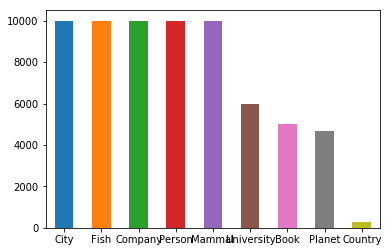

In [54]:
print(len(data))
data.label.value_counts().plot.bar(rot=0)
plt.show()

Save model

In [19]:
data.to_pickle('abstracts.pkl')